<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Covid_19_Visualization_%26_Predictions_(Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Data¶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
%matplotlib inline

In [2]:
world = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/worldometer_data.csv')
full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/full_grouped.csv') # used in Prophet model
covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/country_wise_latest.csv')
day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/day_wise.csv')

In [3]:
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [6]:
full.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
covid.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [10]:
day.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [11]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [12]:
world.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [13]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [14]:
full.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [15]:
#Exploratory Data Analysis
data = dict(type='choropleth',
            locations = covid['Country/Region'],
            locationmode = 'country names',
            z = covid['Confirmed'],
            text = covid['Country/Region'],
            colorbar = {'title':'Confirmed Cases'}
            ) 

layout = dict(title='Covid Cases (CONFIRMED)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap1=go.Figure(data=[data],layout=layout)
iplot(choromap1)

In [16]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalCases'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Total Cases'},
            colorscale = 'viridis'
            ) 

layout = dict(title='Covid Cases (TOTAL)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap2=go.Figure(data=[data],layout=layout)
iplot(choromap2)

In [17]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalRecovered'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Recovered Cases'},
            colorscale = 'blues'
            ) 

layout = dict(title='Recovered',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap3=go.Figure(data=[data],layout=layout)
iplot(choromap3)

In [18]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalDeaths'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Deaths'},
            colorscale = 'reds'
            ) 

layout = dict(title='Deaths',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap4=go.Figure(data=[data],layout=layout)
iplot(choromap4)

In [19]:
sns.set_style('darkgrid')

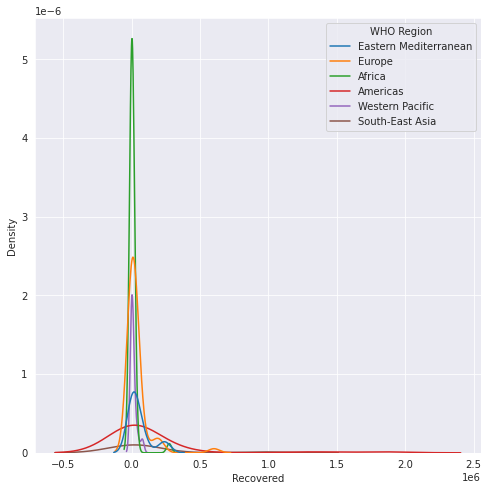

In [20]:
plt.figure(figsize=(8,8))
sns.kdeplot(x = 'Recovered',data=covid, hue="WHO Region")

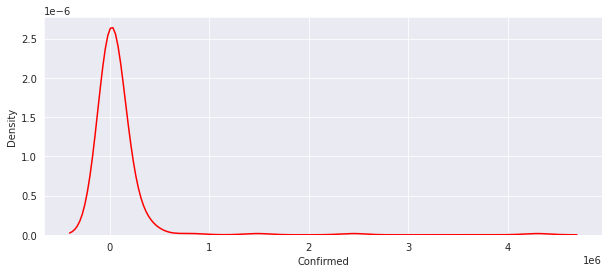

In [21]:
# Confirmed
plt.figure(figsize=(10,4))
ax1 = sns.kdeplot(data=covid, x="Confirmed",color='r')
plt.show(ax1)

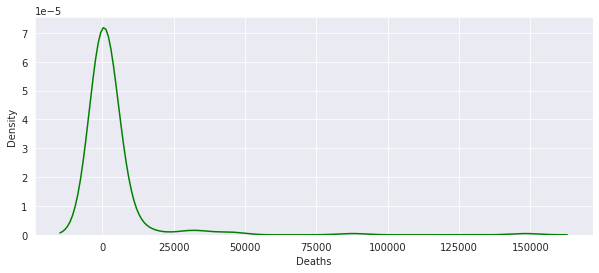

In [22]:
# Deaths
plt.figure(figsize=(10,4))
ax2 = sns.kdeplot(data=covid, x="Deaths", color='g')
plt.show(ax2)

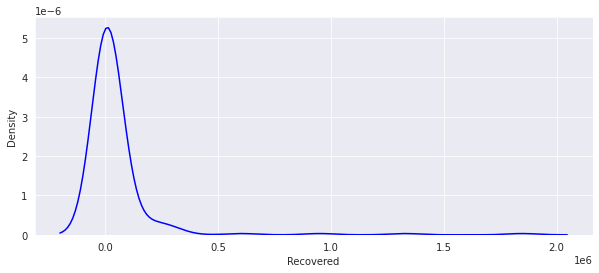

In [23]:
# Recovered
plt.figure(figsize=(10,4))
ax3 = sns.kdeplot(data=covid, x="Recovered", color='b')
plt.show(ax3)

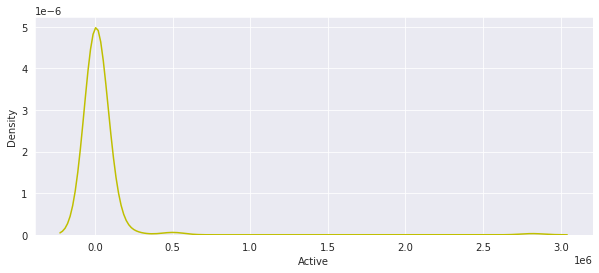

In [24]:
# Active
plt.figure(figsize=(10,4))
ax4 = sns.kdeplot(data=covid, x="Active", color='y')
plt.show(ax4)

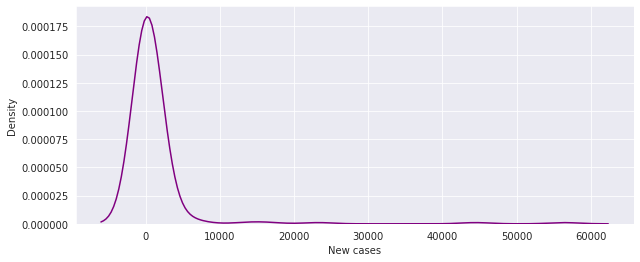

In [25]:
# New Cases
plt.figure(figsize=(10,4))
ax5 = sns.kdeplot(data=covid, x="New cases", color='purple')
plt.show(ax5)

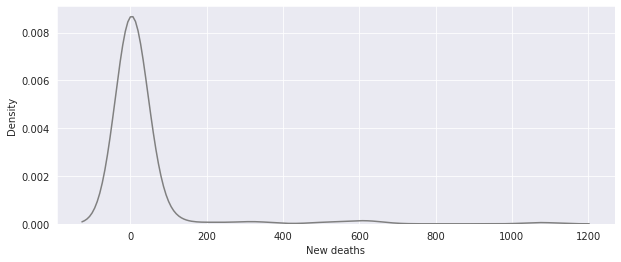

In [26]:
# New Deaths
plt.figure(figsize=(10,4))
ax6 = sns.kdeplot(data=covid, x="New deaths", color='gray')
plt.show(ax6)

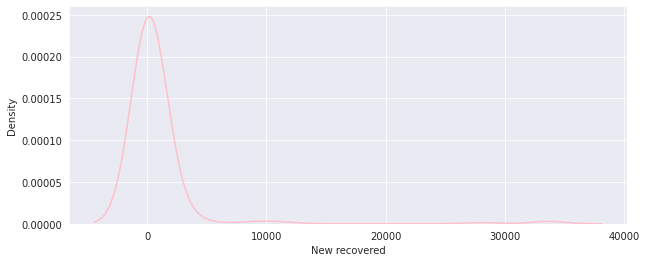

In [27]:
# New Recovered
plt.figure(figsize=(10,4))
ax7 = sns.kdeplot(data=covid, x="New recovered", color='pink')
plt.show(ax7)

In [28]:
px.pie(world[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries')

In [29]:
europe = world[world['Continent'] == 'Europe']
asia = world[world['Continent'] == 'Asia']
north_america = world[world['Continent'] == 'North America']
south_america = world[world['Continent'] == 'South America']
australia_oceania = world[world['Continent'] == 'Australia/Oceania']

In [30]:
px.pie(europe[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries/Regions in Europe')

In [31]:
px.pie(asia[:25], values='TotalCases', names='Country/Region', 
       title='Top 25 Countries/Regions in Asia')

In [32]:
px.pie(north_america[:15], values='TotalCases', names='Country/Region', 
       title='Top 15 Countries/Regions in North America')

In [33]:
px.pie(south_america, values='TotalCases', names='Country/Region', 
       title='Countries/Regions in South America')

In [34]:
px.pie(australia_oceania, values='TotalCases', names='Country/Region', 
       title='Countries/Regions in Australia/Oceania')

In [35]:
fig = px.bar(world[:50], x = 'Country/Region', y = 'TotalRecovered',color = 'Country/Region')
fig

In [36]:
fig2 = px.bar(world[:50], x = 'Country/Region', y = 'TotalDeaths',color = 'Country/Region')
fig2

In [37]:
fig3 = px.bar(covid, x = 'WHO Region', y = 'Confirmed',color = 'WHO Region')
fig3

In [38]:
fig4 = px.bar(covid, x = 'WHO Region', y = 'Recovered',color = 'WHO Region')
fig4

In [39]:
fig5 = px.bar(covid, x = 'WHO Region', y = 'Deaths',color = 'WHO Region')
fig5

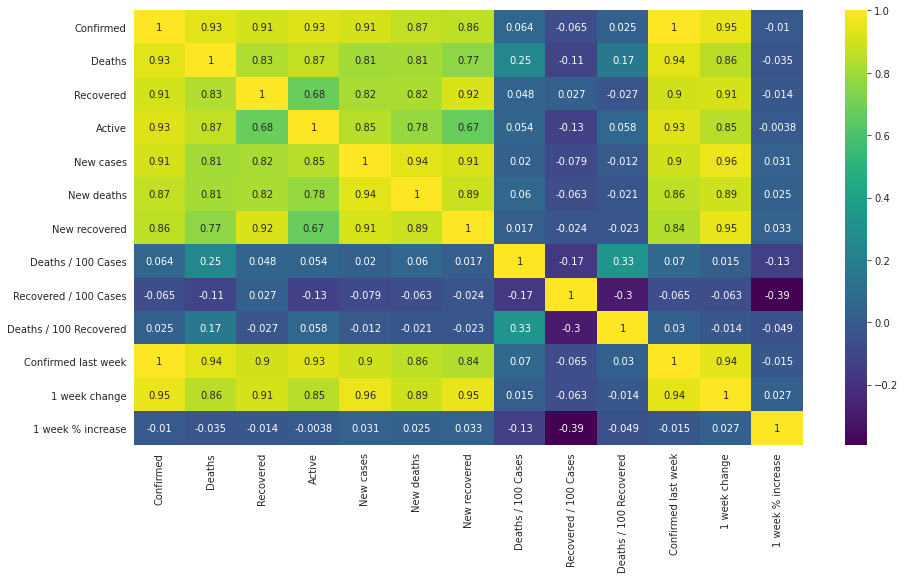

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(covid.corr(),cmap='viridis',annot=True)

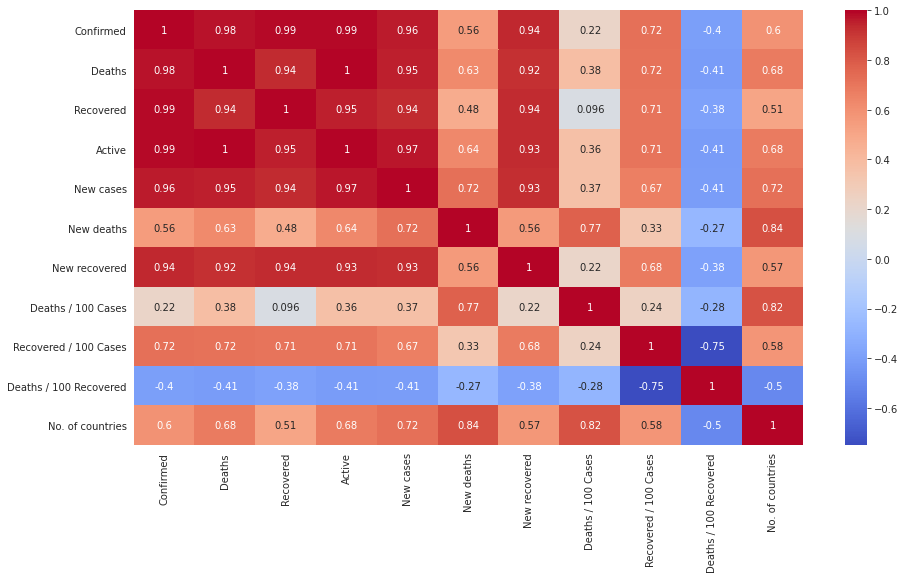

In [41]:
# With this heatmap, we can see what features are most correlated with the number of confirmed cases. Most correlated features:

# Deaths (93%)
# Active (93%)
# Recovered (91%)
# New cases (91%)
# New deaths (87%)
# New recovered (86%)
# Confirmed last week (100%)
# 1 week change (95%)

plt.figure(figsize=(15,8))
sns.heatmap(day.corr(),cmap='coolwarm',annot=True)


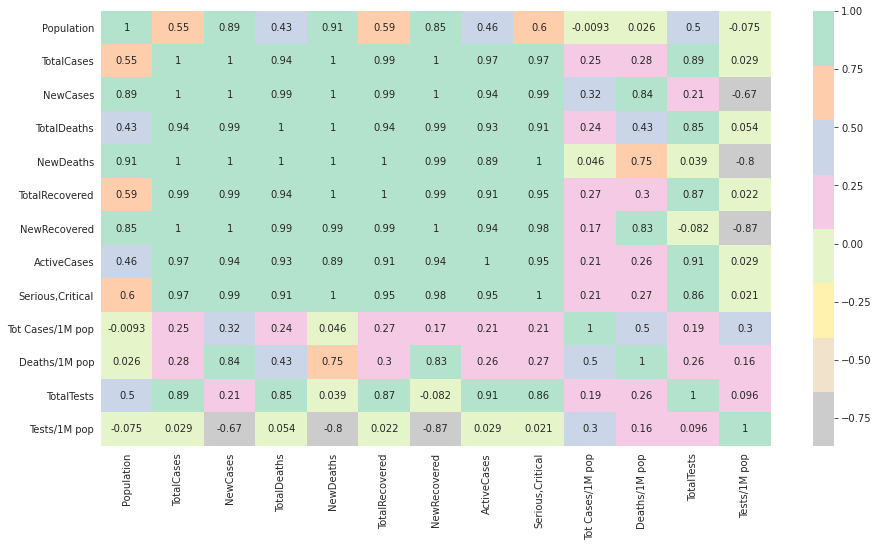

In [42]:
# Most correlated with confirmed:

# Recovered (99%)
# Active (99%)
# Deaths (98%)
# New cases (96%)
# New recovered (94%)
# Recoverd/100 Cases (72%)
# No. of Countries (60%)
# New deaths (56%)
plt.figure(figsize=(15,8))
sns.heatmap(world.corr(),cmap='Pastel2_r',annot=True)

In [43]:
# Most correlated with total cases:

# NewCases (100%)
# NewDeaths (100%)
# NewRecovered (100%)
# ActiveCases (97%)
# SeriousCritical (97%)
# TotalDeaths (94%)
# TotalTests (89%)
# Population (55%)

In [44]:
#Data PreProcessing¶
day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [45]:
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [46]:
covid.isnull().sum() # no null values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [47]:
day.isnull().sum() # no null values

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [48]:
day['Date']=pd.to_datetime(day['Date']) # converting Data into datetime

In [49]:
day['Day'] = day['Date'].apply(lambda x: x.hour)
day['Month'] = day['Date'].apply(lambda x: x.month)
day['Year'] = day['Date'].apply(lambda x: x.dayofweek)

In [50]:
#This creates seperate numerical columns with the year, month, and day.

day_temp = day.copy()
day_temp = day_temp.drop('Date',axis=1)
day_temp.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Day,Month,Year
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6,0,1,2
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8,0,1,3
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9,0,1,4
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,0,1,5
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,0,1,6


In [51]:
#Model for Confirmed Cases
#Train Test Split
from sklearn.model_selection import train_test_split

In [52]:
X = day_temp.drop('Confirmed',axis=1).values
y = day_temp['Confirmed'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
#Building Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
X_train.shape

(131, 13)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[])

Epoch 1/600
5/5 [==============================] - 1s 41ms/step - loss: 40499721273344.0000 - val_loss: 45247904088064.0000
Epoch 2/600
5/5 [==============================] - 0s 7ms/step - loss: 40499721273344.0000 - val_loss: 45247904088064.0000
Epoch 3/600
5/5 [==============================] - 0s 7ms/step - loss: 40499721273344.0000 - val_loss: 45247904088064.0000
Epoch 4/600
5/5 [==============================] - 0s 6ms/step - loss: 40499717079040.0000 - val_loss: 45247904088064.0000
Epoch 5/600
5/5 [==============================] - 0s 8ms/step - loss: 40499717079040.0000 - val_loss: 45247904088064.0000
Epoch 6/600
5/5 [==============================] - 0s 9ms/step - loss: 40499721273344.0000 - val_loss: 45247904088064.0000
Epoch 7/600
5/5 [==============================] - 0s 10ms/step - loss: 40499717079040.0000 - val_loss: 45247895699456.0000
Epoch 8/600
5/5 [==============================] - 0s 10ms/step - loss: 40499712884736.0000 - val_loss: 45247895699456.0000
Epoch 9/600
5

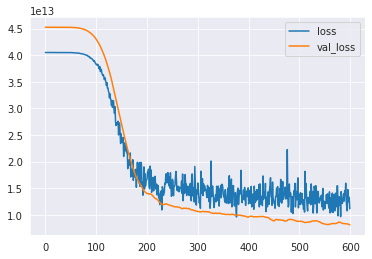

In [57]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [58]:
from sklearn.metrics import mean_squared_error, explained_variance_score

In [59]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictions))

2843414.02504675

In [60]:
from sklearn.metrics import mean_absolute_error

In [61]:
mean_absolute_error(y_test,predictions)

2045712.9155701755

In [62]:
explained_variance_score(y_test,predictions)

0.6892339649166831

In [63]:
from fbprophet import Prophet

In [64]:
conf_data = full[['Date', 'Confirmed']].groupby('Date', as_index = False).sum()
conf_data.columns = ['ds', 'y']
conf_data.ds = pd.to_datetime(conf_data.ds)

In [65]:
conf_data.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [66]:
proph = Prophet()
proph.fit(conf_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
confirmed_pred = proph.make_future_dataframe(periods=60)
confirmed_pred.tail()

,ds
243,2020-09-21
244,2020-09-22
245,2020-09-23
246,2020-09-24
247,2020-09-25


In [68]:
confirmed_forecast = proph.predict(confirmed_pred)
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
243,2020-09-21,2.756292e+07,2.627275e+07,2.872090e+07
244,2020-09-22,2.775234e+07,2.644607e+07,2.897790e+07
245,2020-09-23,2.796231e+07,2.661633e+07,2.916671e+07
246,2020-09-24,2.817630e+07,2.674468e+07,2.943642e+07
247,2020-09-25,2.839157e+07,2.700089e+07,2.964067e+07


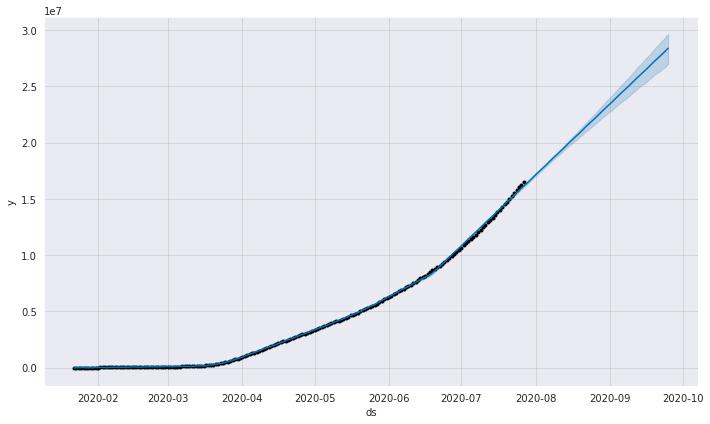

In [69]:
fig1 = proph.plot(confirmed_forecast)

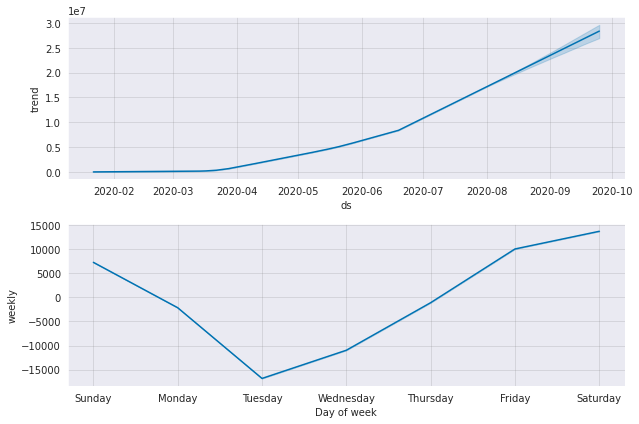

In [70]:
fig2 = proph.plot_components(confirmed_forecast)

In [71]:
#Model for Deaths¶
deaths_data = full[['Date', 'Deaths']].groupby('Date', as_index = False).sum()
deaths_data.columns = ['ds', 'y']
deaths_data.ds = pd.to_datetime(deaths_data.ds)

In [72]:
deaths_data.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [73]:
proph2 = Prophet()
proph2.fit(deaths_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
deaths_pred = proph2.make_future_dataframe(periods=60)
deaths_pred.tail()

,ds
243,2020-09-21
244,2020-09-22
245,2020-09-23
246,2020-09-24
247,2020-09-25


In [75]:
deaths_forecast = proph2.predict(deaths_pred)
deaths_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
243,2020-09-21,928754.576065,866969.394183,9.870180e+05
244,2020-09-22,933960.350444,871882.998231,9.935273e+05
245,2020-09-23,939526.757091,875598.907777,1.000718e+06
246,2020-09-24,945136.181499,878933.323077,1.007680e+06
247,2020-09-25,950651.422208,883592.426748,1.014320e+06


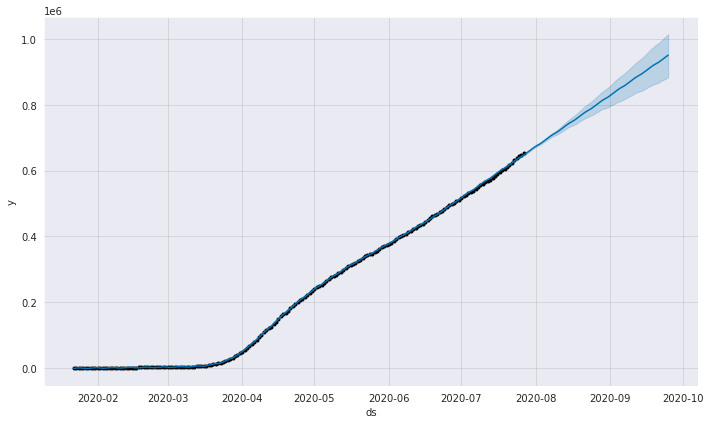

In [76]:
fig3 = proph2.plot(deaths_forecast)

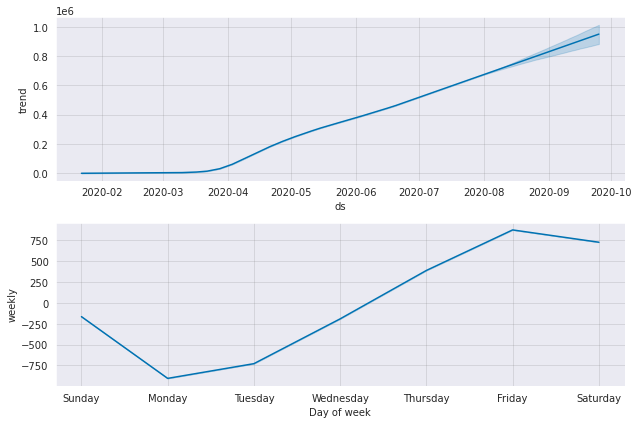

In [77]:
fig4 = proph2.plot_components(deaths_forecast)

In [78]:
#Model for Recovered¶
rec_data = full[['Date', 'Recovered']].groupby('Date', as_index = False).sum()
rec_data.columns = ['ds', 'y']
rec_data.ds = pd.to_datetime(rec_data.ds)

In [79]:
rec_data.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [80]:
proph3 = Prophet()
proph3.fit(rec_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
rec_pred = proph3.make_future_dataframe(periods=60)

In [82]:
rec_forecast = proph3.predict(deaths_pred)
rec_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
243,2020-09-21,1.684330e+07,1.607452e+07,1.765978e+07
244,2020-09-22,1.697078e+07,1.617354e+07,1.781954e+07
245,2020-09-23,1.711298e+07,1.629289e+07,1.798249e+07
246,2020-09-24,1.725579e+07,1.642513e+07,1.812973e+07
247,2020-09-25,1.739734e+07,1.653998e+07,1.829130e+07


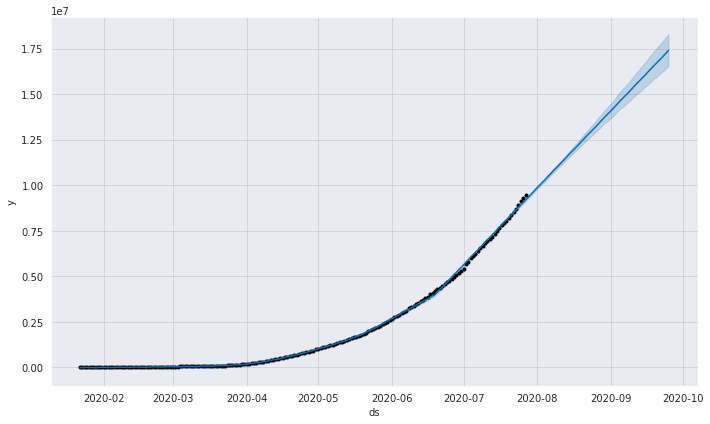

In [83]:
fig5 = proph3.plot(rec_forecast)

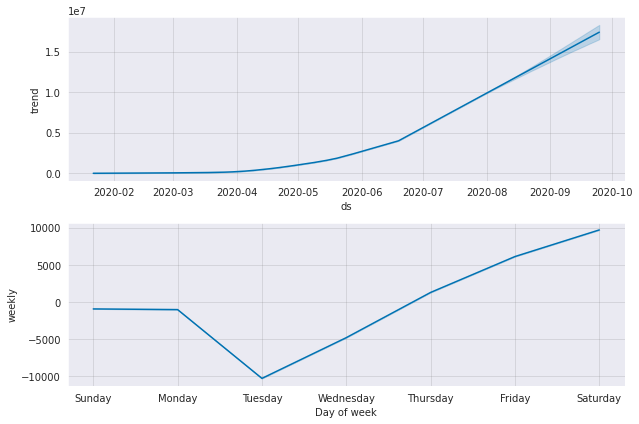

In [84]:
fig6 = proph3.plot_components(rec_forecast)